# C207 Activity Sheet 8

## 1. What three factors affect the frequency width of a spectral line?

1. Natural broadening (Heisenberg uncertainty)
2. Doppler broadening (nonzero photon velocity, thermal or otherwise)
3. Collisional broadening (collisions causing photon de-excitation)

## 2. What is a Voigt Profile?

Literally, the convolution of the Doppler spectrum and the Lorentzian from natural broadening.
The reason is that each photon in the natural broadening spectrum has Doppler broadening of its own, hence the convolution.

## 3. For the normal Zeeman Effect, what is the magnetic field coupling to?

The orbital angular momentum of the electron and magnetic field

## 4. Where in nature do astronomers see Zeeman splitting?

Write a response here

## 5. Hydrogen Spectroscopy

Suppose you observe clouds of hydrogen in Ly$\alpha$ against a white backlight.  Code up a Voigt
profile covering $\pm1$ THz around line center, and then simulate the absorption of the white backlight for hydrogen columns
ranging from $N=10^4$ to $10^{10}$ cm$^{-2}$ with temperatures of 10, 100, and 1000 K.  Plot the width
(at half depth) of the transition as a function of $N$ for each temperature.  Based on your results,
would an optically thin or optically thick line of sight be best for learning a cloud's temperature?
How about density?

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

c = 3e10 # cm/s, speed of light
kB = 1.4e-16 # cgs, Boltzmann constant
mp = 1e-24 # g, proton mass
A21 = 5e8 # s^-1, Einstein A of LyA
L21 = 121e-7 # cm, wavelength of LyA
F21 = c / L21 # Hz, frequency of LyA

def lorentz(nu, A=A21, nu0=F21):
    """Return a Lorentzian line profile function evaluated at the specified frequencies.
    Arguments:
        nu: spectral frequency [Hz]
        A: Einstein A coefficient [s^-1], default: LyA
        nu0: center frequency [Hz], default: LyA"""
    ans = A/(4*np.pi)**2 / ((nu - nu0)**2 + (A/(4*np.pi))**2)
    return ans / ans.sum()

def doppler(nu, T, nu0=F21):
    """Return a Gaussian line profile function evaluated at the specified frequencies.
    Arguments:
        nu: spectral frequency [Hz]
        T: Temperature [K]
        nu0: center frequency [Hz], default: LyA"""
    dnu = np.sqrt(2 * kB * T / mp) / L21
    ans = 1./(dnu * np.sqrt(np.pi)) * np.exp(-(nu-nu0)**2/dnu**2)
    return ans / ans.sum()

def voigt(nu, T, A=A21, nu0=F21):
    """Return a Voigt line profile function evaluated at the specified frequencies.
    Arguments:
        nu: spectral frequency [Hz]
        T: Temperature [K]
        A: Einstein A coefficient [s^-1], default: LyA
        nu0: center frequency [Hz], default: LyA"""
    phi_lorentz = lorentz(nu=nu, A=A, nu0=nu0)
    phi_doppler = doppler(nu=nu, T=T, nu0=nu0)
    phi_voigt = np.convolve(phi_lorentz, phi_doppler, mode='same')
    phi_voigt_norm = phi_voigt/sum(phi_voigt)
    return phi_voigt_norm

def sigma(nu, A, T, nu0=F21):
    """Return the cross-section for photon absorption."""
    lamb0 = c/nu0
    return lamb0**2/(8*np.pi) * A * voigt(nu=nu, T=T, A=A, nu0=nu0)

In [4]:
nu_vec = np.linspace(0.9995 * F21, 1.0005 * F21, 10000)
dnu = nu_vec[1] - nu_vec[0]
attenuation = 0.01 # Point from which to calculate the width of the dip in intensity

N_vec = np.logspace(4, 10, 100) # different column densities
T_vec = np.array([10,100,1000]) # different temperatures

C:\Anaconda3\lib\site-packages\matplotlib\ticker.py:1097: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)


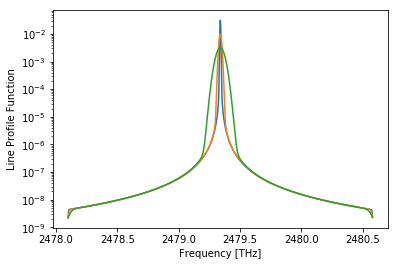

<Figure size 432x288 with 0 Axes>

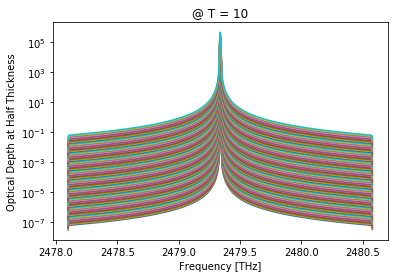

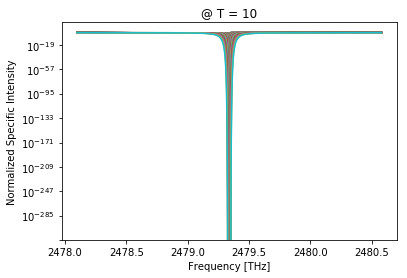

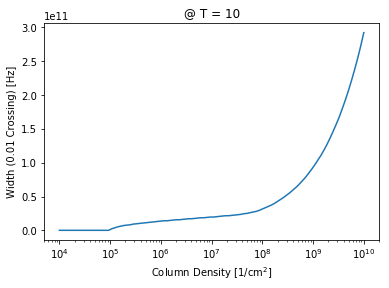

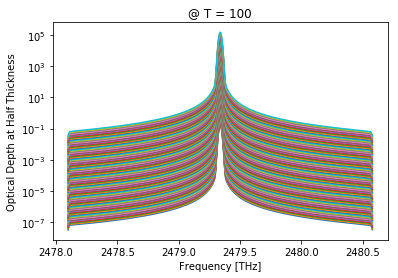

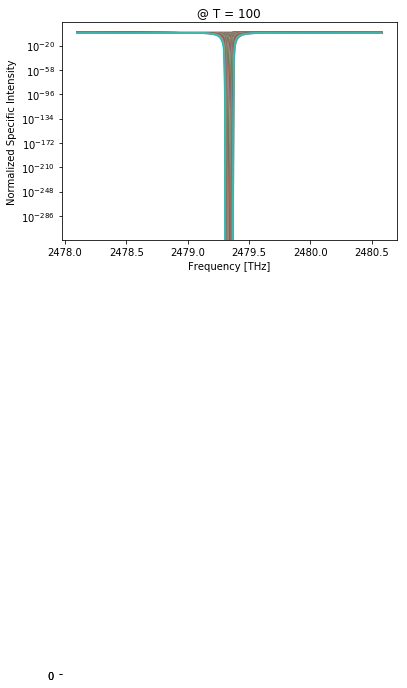

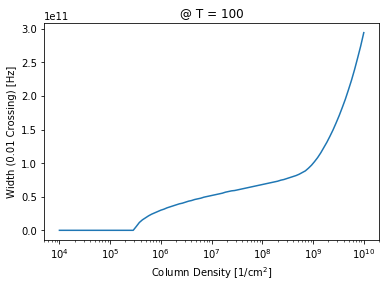

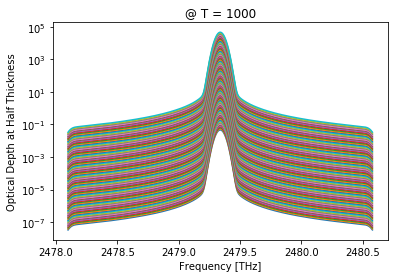

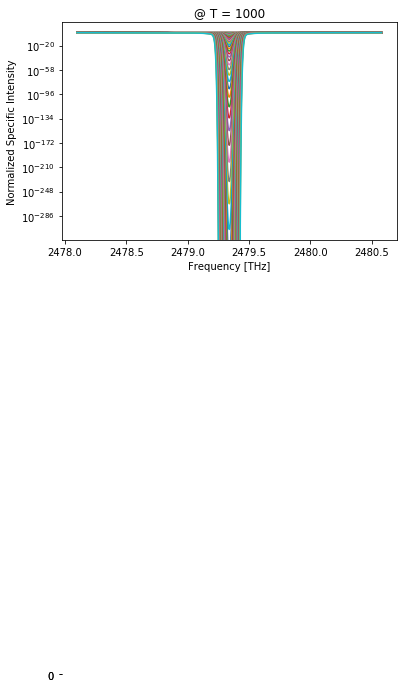

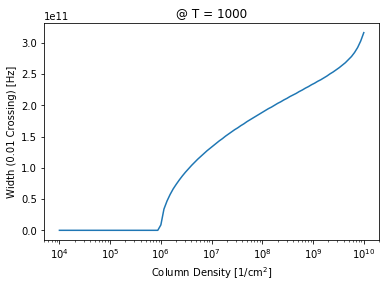

In [5]:
fig_voigt = plt.figure()
fig_tau = plt.figure()

plt.figure(fig_voigt.number)
plt.xlabel('Frequency [THz]')
plt.ylabel('Line Profile Function')

for Ti in T_vec:
    plt.figure(fig_voigt.number)
    plt.semilogy(nu_vec*1e-12, voigt(nu_vec, Ti, A21, F21), label=f'T={Ti}K')
    w_vec = []
    
    fig_tau = plt.figure()
    fig_intensity = plt.figure()
    fig_width = plt.figure()
    
    for n in (fig_tau.number, fig_intensity.number, fig_width.number):
        plt.figure(n)
        plt.title(f'@ T = {Ti}')
    
    plt.figure(fig_tau.number)
    plt.xlabel('Frequency [THz]')
    plt.ylabel('Optical Depth at Half Thickness')

    plt.figure(fig_intensity.number)
    plt.xlabel('Frequency [THz]')
    plt.ylabel('Normalized Specific Intensity')
        
    for Ni in N_vec:
        plt.figure(fig_tau.number)
        tau = Ni/2 * sigma(nu_vec, A21, Ti, nu0=F21) # optical depth at half depth
        plt.semilogy(nu_vec*1e-12, tau, label=f'N={Ni}')
        
        plt.figure(fig_intensity.number)
        Inu = np.exp(-tau)
        plt.semilogy(nu_vec*1e-12, Inu, label=f'N={Ni}')
        
        idx = np.argwhere(np.diff(np.sign(Inu-attenuation))).flatten()
        if len(idx) == 0:
            w_vec.append(0)
        elif len(idx) == 2:
            w = np.abs(nu_vec[idx[0]] - nu_vec[idx[1]])
            w_vec.append(w)
        else:
            raise ValueError(f'Multiple dips below {attenuation} mark')
    
    plt.figure(fig_width.number)
    plt.semilogx(N_vec, w_vec)
    plt.xlabel('Column Density [1/cm$^2$]')
    plt.ylabel(f'Width ({attenuation} Crossing) [Hz]')

Write a response here